# Natural Language ToolKit (NLTK)

In [1]:
import nltk

In [2]:
# nltk.download('all-corpora')

In [6]:
import json
dataset = None

with open('quotes.json', 'r') as f:
    dataset = json.load(f)

len(dataset)

300

In [ ]:
quote = dataset[0]['quote']

In [10]:
# dataset[0]['quote'].split()

["Don't",
 'cry',
 'because',
 "it's",
 'over,',
 'smile',
 'because',
 'it',
 'happened.']

# Tokenization

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize


word_tokenize(dataset[0]['quote'])

['Do',
 "n't",
 'cry',
 'because',
 'it',
 "'s",
 'over',
 ',',
 'smile',
 'because',
 'it',
 'happened',
 '.']

In [15]:
# dataset[1]['quote']

"I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best."

In [14]:
sent_tokenize(dataset[1]['quote'])

["I'm selfish, impatient and a little insecure.",
 'I make mistakes, I am out of control and at times hard to handle.',
 "But if you can't handle me at my worst, then you sure as hell don't deserve me at my best."]

# Removing stopwords, punctuations

In [19]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from string import punctuation
punct = list(punctuation)

In [21]:
print(dataset[1]['quote'])
tokens = word_tokenize(dataset[1]['quote'])
len(tokens)

I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.


50

In [22]:
cleaned_tokens = [token for token in tokens if token not in stop_words 
                  and token not in punctuation]
len(cleaned_tokens)

24

### Custom Tokenizer

In [23]:
word_tokenize("My email address is: abc@gmail.com")

['My', 'email', 'address', 'is', ':', 'abc', '@', 'gmail.com']

In [30]:
from nltk.tokenize import RegexpTokenizer

# regex = RegexpTokenizer(r'[A-Za-z0-9]+@[A-Za-z]+\.[A-Za-z]+')
regex = RegexpTokenizer(r'\w+@[A-Za-z]+\.[A-Za-z]+')
regex.tokenize("My email addresses are: abc@gmail.com foo@bar.xyz")

['abc@gmail.com', 'foo@bar.xyz']

# Stemming, Lemmatization

In [36]:
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk import WordNetLemmatizer

ps = PorterStemmer()
ss = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

In [38]:
print(ps.stem('jumping'))
print(ps.stem('lately'))
print(ps.stem('assess'))
print(ps.stem('ran'))

print(lemmatizer.lemmatize('ran', 'v'))
print(lemmatizer.lemmatize('better', 'a'))

jump
late
assess
ran
run
good


In [41]:
all_sentences = []
for q in dataset:
    quote = q['quote']
    for sentence in sent_tokenize(quote):
        if len(sentence) > 1:
            all_sentences.append(sentence)
len(all_sentences)

638

In [43]:
all_sentences[0:5]

["Don't cry because it's over, smile because it happened.",
 "I'm selfish, impatient and a little insecure.",
 'I make mistakes, I am out of control and at times hard to handle.',
 "But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.",
 'Be yourself; everyone else is already taken.']

# Bag of Words

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
vec = cv.fit_transform(all_sentences[:10])

In [54]:
vec

<10x85 sparse matrix of type '<class 'numpy.int64'>'
	with 105 stored elements in Compressed Sparse Row format>

In [61]:
word_tokenize(dataset[0]['quote'])

['Do',
 "n't",
 'cry',
 'because',
 'it',
 "'s",
 'over',
 ',',
 'smile',
 'because',
 'it',
 'happened',
 '.']

In [55]:
cv.vocabulary_

{'don': 18,
 'cry': 15,
 'because': 8,
 'it': 36,
 'over': 56,
 'smile': 61,
 'happened': 25,
 'selfish': 59,
 'impatient': 32,
 'and': 3,
 'little': 39,
 'insecure': 34,
 'make': 43,
 'mistakes': 48,
 'am': 2,
 'out': 55,
 'of': 53,
 'control': 14,
 'at': 6,
 'times': 73,
 'hard': 26,
 'to': 74,
 'handle': 24,
 'but': 12,
 'if': 31,
 'you': 83,
 'can': 13,
 'me': 46,
 'my': 49,
 'worst': 82,
 'then': 68,
 'sure': 65,
 'as': 5,
 'hell': 28,
 'deserve': 17,
 'best': 9,
 'be': 7,
 'yourself': 84,
 'everyone': 21,
 'else': 20,
 'is': 35,
 'already': 1,
 'taken': 66,
 'two': 75,
 'things': 70,
 'are': 4,
 'infinite': 33,
 'the': 67,
 'universe': 76,
 'human': 29,
 'stupidity': 64,
 'not': 52,
 'about': 0,
 'so': 62,
 'many': 44,
 'books': 11,
 'time': 72,
 'who': 80,
 'say': 58,
 'what': 79,
 'feel': 22,
 'those': 71,
 'mind': 47,
 'matter': 45,
 'room': 57,
 'without': 81,
 'like': 37,
 'body': 10,
 'soul': 63,
 've': 77,
 'gotta': 23,
 'dance': 16,
 'there': 69,
 'nobody': 51,
 'watching

In [56]:
len(cv.vocabulary_)

85

In [59]:
ex = vec.toarray()[0]
# len(ex), (ex!=0).sum()
ex

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [58]:
cv.inverse_transform(vec.toarray()[0])

[array(['because', 'cry', 'don', 'happened', 'it', 'over', 'smile'],
       dtype='<U9')]

# Ngrams

In [66]:
from nltk import bigrams, trigrams, ngrams

print(list(bigrams("This is an example sentence".split())))

print(list(trigrams("This is an example sentence".split())))

[('This', 'is'), ('is', 'an'), ('an', 'example'), ('example', 'sentence')]
[('This', 'is', 'an'), ('is', 'an', 'example'), ('an', 'example', 'sentence')]


# POS Tagging, Named Entity Recognition

In [68]:
from nltk import pos_tag, ne_chunk

pos_tag(word_tokenize(dataset[0]['quote']))

[('Do', 'VBP'),
 ("n't", 'RB'),
 ('cry', 'VB'),
 ('because', 'IN'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('over', 'RP'),
 (',', ','),
 ('smile', 'RB'),
 ('because', 'IN'),
 ('it', 'PRP'),
 ('happened', 'VBD'),
 ('.', '.')]

In [70]:
from nltk.corpus import brown

In [71]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [76]:
sents = brown.sents(categories='government')
len(sents)

3032

In [91]:
' '.join(sents[0])

'The Office of Business Economics ( OBE ) of the U.S. Department of Commerce provides basic measures of the national economy and current analysis of short-run changes in the economic situation and business outlook .'

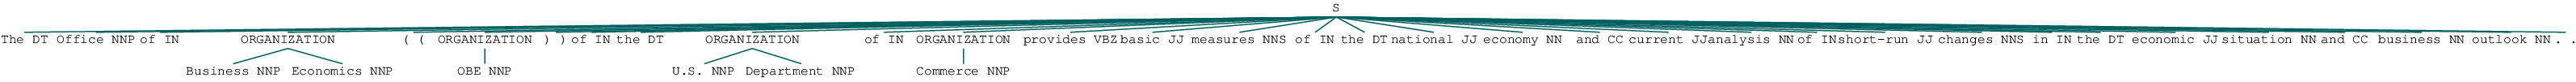

In [97]:
ne_chunk(pos_tag(word_tokenize(' '.join(sents[0]))))

# TF-IDF
#### (Term Frequency - Inverse Document Frequency)

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,3))
vec = tfidf.fit_transform(all_sentences)

In [104]:
vec

<638x13861 sparse matrix of type '<class 'numpy.float64'>'
	with 21698 stored elements in Compressed Sparse Row format>

In [105]:
v = vec.toarray()[0]
v[v!=0]

array([0.24277294, 0.40403479, 0.21489387, 0.21489387, 0.2020174 ,
       0.21489387, 0.21489387, 0.11463609, 0.21489387, 0.21489387,
       0.19288139, 0.16714438, 0.21489387, 0.21489387, 0.21489387,
       0.17086892, 0.21489387, 0.21489387, 0.17086892, 0.21489387,
       0.21489387])